Clip              69
Fall Start       0.9
Fall End         6.4
Fall Duration    5.5
Name: 68, dtype: object


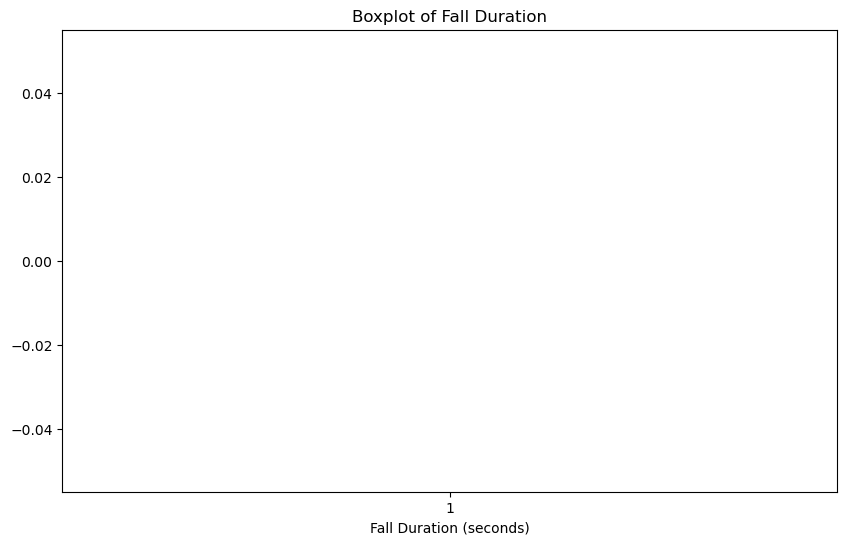

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define directories and CSV file
fall_dir = "originals/fall"
root_output_dir = "MMACTION"
csv_file = "Labels.csv"

# Load the fall event data
fall_data = pd.read_csv(csv_file)

# Function to extract time from video
def extract_time_from_video(clip_dir, clip_int):
    for filename in os.listdir(clip_dir):
        if f"fall_{clip_int:03d}" in filename:
            video_file = os.path.join(clip_dir, filename)
            cap = cv2.VideoCapture(video_file)
            fps = cap.get(cv2.CAP_PROP_FPS)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            duration = frame_count / fps
            return duration

# Adjust Fall Start and Fall End times
for index, row in fall_data.iterrows():
    if row['Fall Start'] == 'START':
        fall_data.at[index, 'Fall Start'] = 0
    if row['Fall End'] == 'END':
        clip_int = row['Clip']
        duration = extract_time_from_video(fall_dir, clip_int)
        fall_data.at[index, 'Fall End'] = duration

# Calculate Fall Duration
#fall_data['Fall Duration'] = fall_data['Fall End'] - fall_data['Fall Start']
# Calculate Fall Duration
fall_data['Fall Duration'] = fall_data['Fall End'].astype(float) - fall_data['Fall Start'].astype(float)
# Create boxplot for fall duration
# Print the fall with the longest duration
longest_fall = fall_data.loc[fall_data['Fall Duration'].idxmax()]
print(longest_fall)
plt.figure(figsize=(10,6))
plt.boxplot(fall_data['Fall Duration'])
plt.title('Boxplot of Fall Duration')
plt.xlabel('Fall Duration (seconds)')
plt.show()

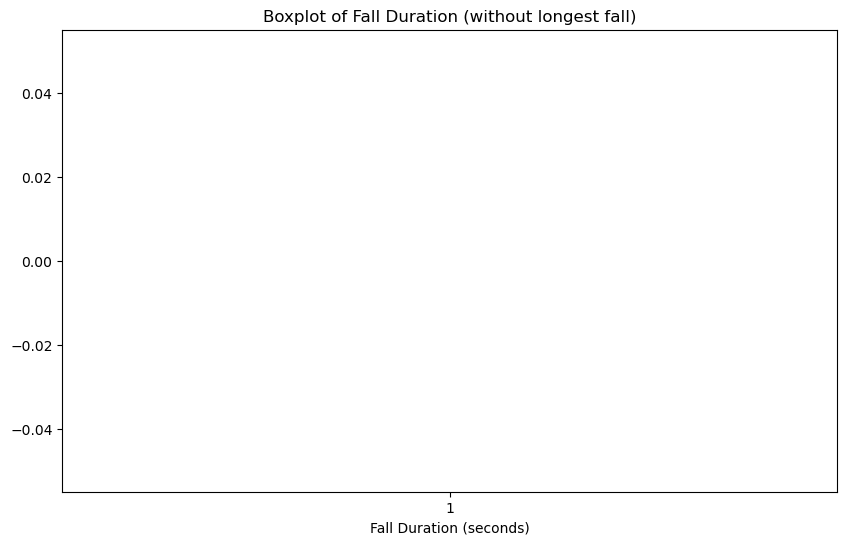

In [2]:
# Remove the longest fall from the dataframe
fall_data_without_longest = fall_data.drop(fall_data['Fall Duration'].idxmax())

# Create boxplot for fall duration without the longest fall
plt.figure(figsize=(10,6))
plt.boxplot(fall_data_without_longest['Fall Duration'])
plt.title('Boxplot of Fall Duration (without longest fall)')
plt.xlabel('Fall Duration (seconds)')
plt.show()